In [241]:
# Problem Statement:

# "Analyze an online retail transactional dataset to uncover key sales trends,
# identify top-performing products and customers,
# and understand customer purchasing patterns to provide foundational business insights."

In [242]:
# Collecting Data into DataFrame

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
df = pd.read_csv("/content/online_retail_data.csv")

In [245]:
df

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,67967,2024-05-04,965,40,Books & Stationery,Notebook,3,495.24,Cash on Delivery,Hodgemouth,NaN,NaN,30
996,99828,2024-09-12,510,40,Books & Stationery,Story Book,5,427.73,Credit Card,Douglastown,3.0,F,72
997,92290,2024-11-06,445,10,Electronics,Smartphone,5,354.64,Bank Transfer,New Amberville,NaN,M,49
998,61427,2024-09-17,410,10,Electronics,Laptop,4,221.54,Cash on Delivery,New Sean,3.0,M,71


In [246]:
# Data Cleaning

In [247]:
# Handling Null Values

df.isnull().any()

,0
customer_id,False
order_date,False
product_id,False
category_id,False
category_name,False
product_name,False
quantity,False
price,False
payment_method,False
city,False


In [248]:
# Check for duplicates

df.duplicated().any()

np.False_

In [249]:
# Checking Inconsistency and dtypes

df.dtypes

,0
customer_id,int64
order_date,object
product_id,int64
category_id,int64
category_name,object
product_name,object
quantity,int64
price,float64
payment_method,object
city,object


In [250]:
df['category_name'].str.strip()
df['payment_method'].str.strip()
df

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,67967,2024-05-04,965,40,Books & Stationery,Notebook,3,495.24,Cash on Delivery,Hodgemouth,NaN,NaN,30
996,99828,2024-09-12,510,40,Books & Stationery,Story Book,5,427.73,Credit Card,Douglastown,3.0,F,72
997,92290,2024-11-06,445,10,Electronics,Smartphone,5,354.64,Bank Transfer,New Amberville,NaN,M,49
998,61427,2024-09-17,410,10,Electronics,Laptop,4,221.54,Cash on Delivery,New Sean,3.0,M,71


In [251]:
# Adding a columns order total

df['order_total'] = df['quantity']*df['price']
df

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age,order_total
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56,746.72
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59,1496.70
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64,115.00
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34,460.22
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33,706.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,67967,2024-05-04,965,40,Books & Stationery,Notebook,3,495.24,Cash on Delivery,Hodgemouth,NaN,NaN,30,1485.72
996,99828,2024-09-12,510,40,Books & Stationery,Story Book,5,427.73,Credit Card,Douglastown,3.0,F,72,2138.65
997,92290,2024-11-06,445,10,Electronics,Smartphone,5,354.64,Bank Transfer,New Amberville,NaN,M,49,1773.20
998,61427,2024-09-17,410,10,Electronics,Laptop,4,221.54,Cash on Delivery,New Sean,3.0,M,71,886.16


In [252]:
#  Exploring Trends and anomalies in Data

In [253]:
df.sort_values('order_date', inplace=True)
df

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age,order_total
920,94899,2024-03-19,853,30,Home & Living,Vase,5,309.64,Cash on Delivery,East Maryland,4.0,F,47,1548.20
17,79898,2024-03-19,871,10,Electronics,Smartphone,5,84.89,Credit Card,Fullerland,5.0,M,68,424.45
307,14447,2024-03-20,761,40,Books & Stationery,Pen,2,109.97,Cash on Delivery,Peterston,NaN,F,69,219.94
829,52849,2024-03-20,829,20,Fashion,T-shirt,3,99.38,Bank Transfer,Katherineview,NaN,F,19,298.14
874,65571,2024-03-20,646,20,Fashion,Pants,1,135.56,Bank Transfer,Michaelside,NaN,M,20,135.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,66977,2025-03-18,568,20,Fashion,Dress,1,354.32,Bank Transfer,Henryborough,5.0,M,67,354.32
208,25747,2025-03-18,874,30,Home & Living,Painting,4,60.76,Cash on Delivery,Amandaborough,1.0,F,64,243.04
989,75395,2025-03-19,175,40,Books & Stationery,Novel,2,300.16,Bank Transfer,Jesseburgh,3.0,M,64,600.32
910,27730,2025-03-19,385,30,Home & Living,Blanket,1,366.27,Bank Transfer,Tiffanystad,5.0,M,44,366.27


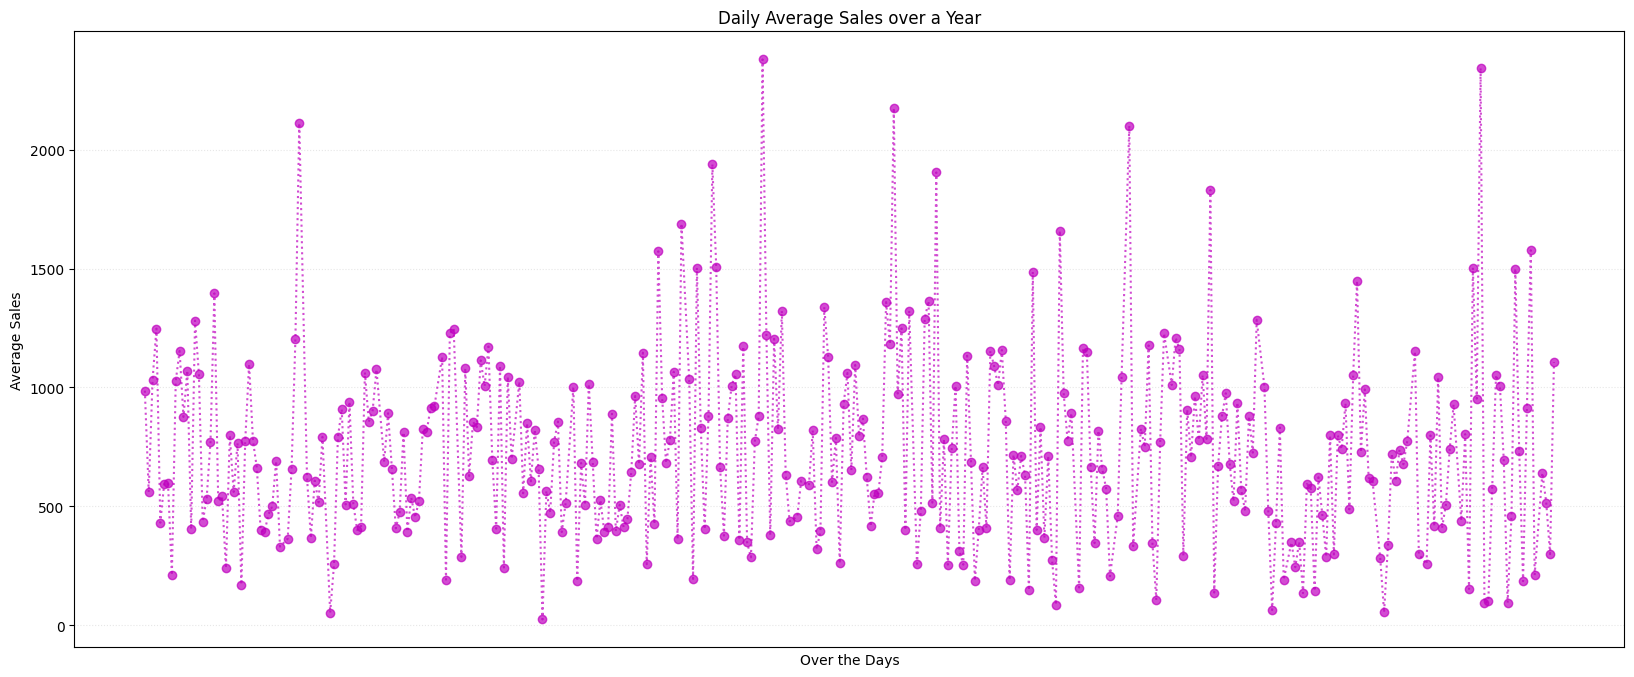

In [277]:
# Daily Average Sales

daily_avg = df.groupby('order_date')['order_total'].mean()

plt.figure(figsize=(20, 8))
plt.plot(daily_avg.index, daily_avg.values, c='m', marker='o', ls=':', alpha=0.7)
plt.title('Daily Average Sales over a Year')
plt.xlabel('Over the Days')
plt.ylabel('Average Sales')
plt.xticks([])
plt.grid(ls=':', alpha=0.3)
plt.show()

This Store has a very divesre spread of daily average sales over the years,
which is good actually,

As the Average Sales has been recovered everytime it had a fall-back which is sign of good business.

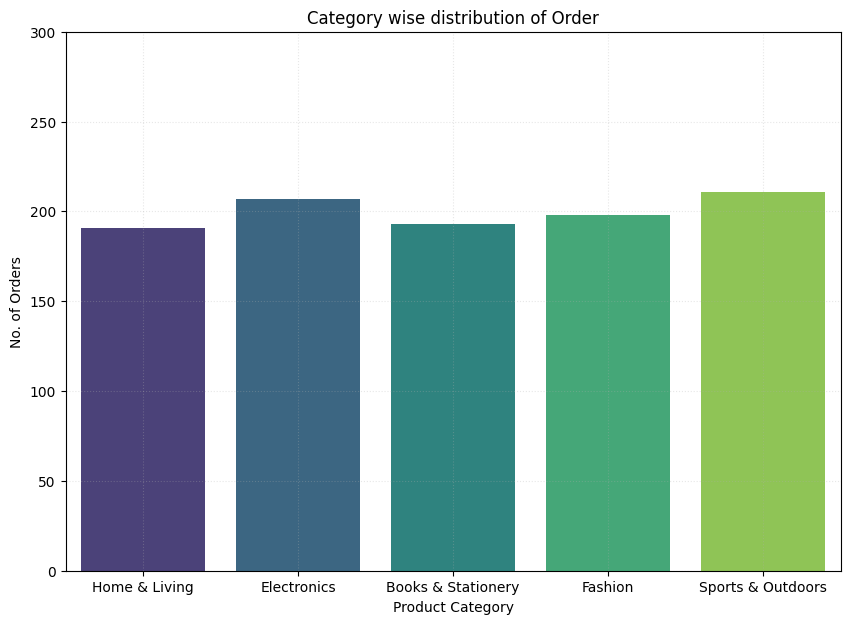

In [255]:
# Count of no. orders per Categories over the data

plt.figure(figsize=(10, 7))
sns.countplot(df, x='category_name', hue='category_name', palette='viridis', stat='count')
plt.title('Category wise distribution of Order')
plt.xlabel('Product Category')
plt.ylabel('No. of Orders')
plt.ylim(0, 300)
plt.grid(ls=':', alpha=0.3)
plt.show()

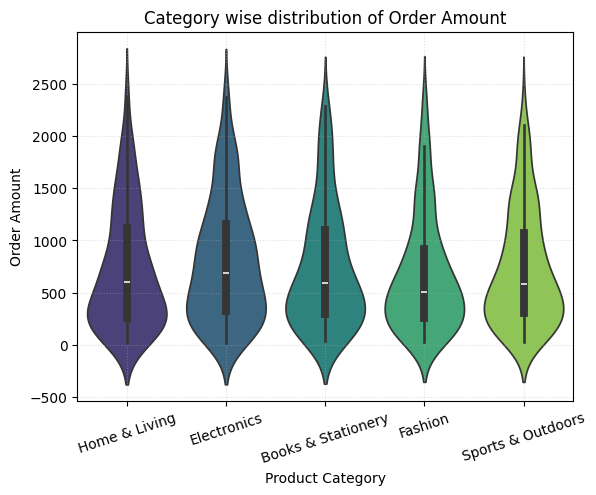

In [256]:
# Distribution Category-wise order total

sns.violinplot(df, x='category_name', y='order_total', hue='category_name', palette='viridis')
plt.title('Category wise distribution of Order Amount')
plt.xlabel('Product Category')
plt.ylabel('Order Amount')
plt.xticks(rotation=18)
plt.grid(ls=':', alpha=0.4)
plt.show()

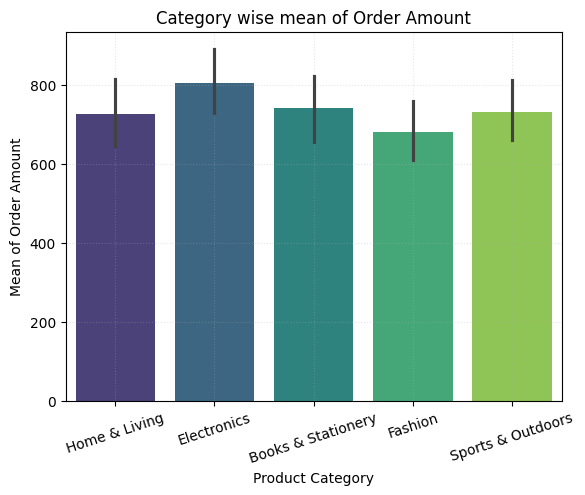

In [257]:
# Category-wise mean value of order amount

sns.barplot(df, x='category_name', y='order_total', hue='category_name', palette='viridis')
plt.title('Category wise mean of Order Amount')
plt.xlabel('Product Category')
plt.ylabel('Mean of Order Amount')
plt.xticks(rotation=18)
plt.grid(ls=':', alpha=0.3)
plt.show()

This Shows the Store has maintained the customer base of each category of Prodect ,

which we can see that over the year in above plots

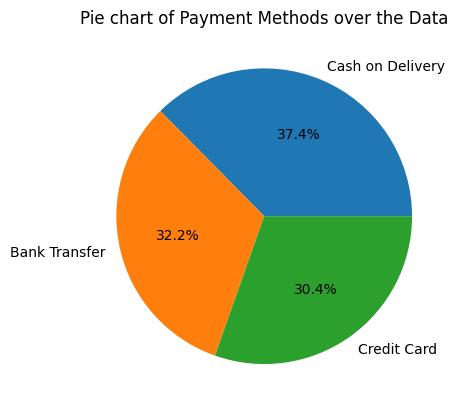

In [258]:
# Which payment method is used mostly

pm_counts = df['payment_method'].value_counts()

plt.pie(pm_counts, labels=pm_counts.index, autopct="%1.1f%%")
plt.title('Pie chart of Payment Methods over the Data')
plt.show()

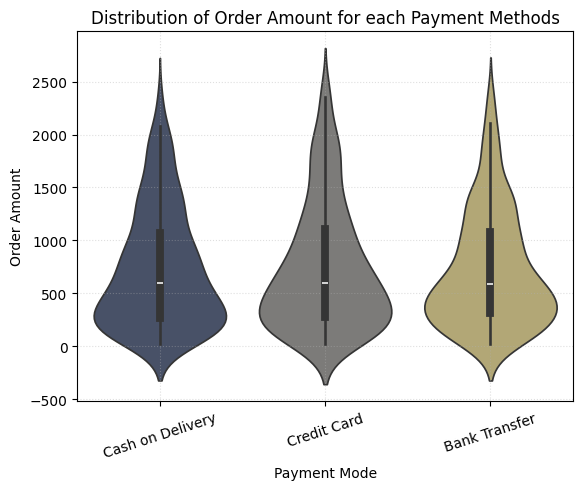

In [259]:
# Which size of Order Amount lead to which payment option ?

sns.violinplot(df, x='payment_method', y='order_total', hue='payment_method', palette='cividis')
plt.title('Distribution of Order Amount for each Payment Methods')
plt.xlabel('Payment Mode')
plt.ylabel('Order Amount')
plt.xticks(rotation=18)
plt.grid(ls=':', alpha=0.4)
plt.show()

Does the Payment Method selection by customer depend on order amount ?
No

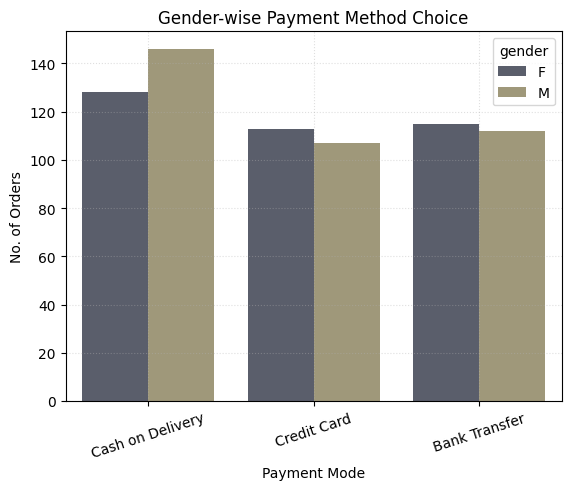

In [260]:
# Which Gender prefer which Payment Method ?

sns.countplot(df.dropna(), x='payment_method', hue='gender', palette='cividis')
plt.title('Gender-wise Payment Method Choice')
plt.xlabel('Payment Mode')
plt.ylabel('No. of Orders')
plt.xticks(rotation=18)
plt.grid(ls=':', alpha=0.4)
plt.show()

Does the Payment Method selection by customer depend on Gender ?
Yes, More Men prefered to pay by Cash on Delivery

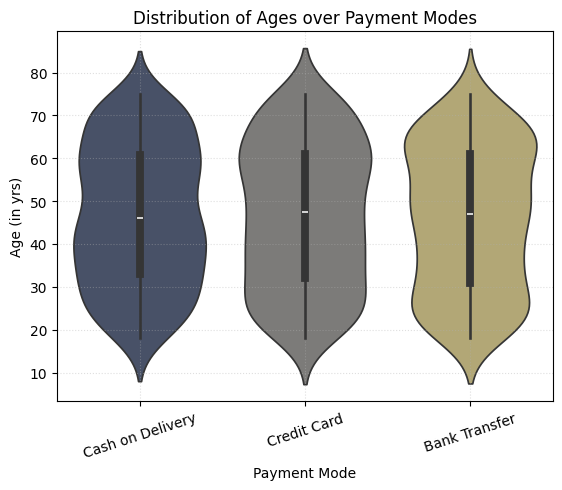

In [261]:
# Which Age prefer which Payment Method ?

sns.violinplot(df, x='payment_method', y='age', hue='payment_method', palette='cividis')
plt.title('Distribution of Ages over Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Age (in yrs)')
plt.xticks(rotation=18)
plt.grid(ls=':', alpha=0.4)
plt.show()

Does the Payment Method selection by customer depend on order amount ?
No, Above distribution shows that no age range shows a more deflected curve

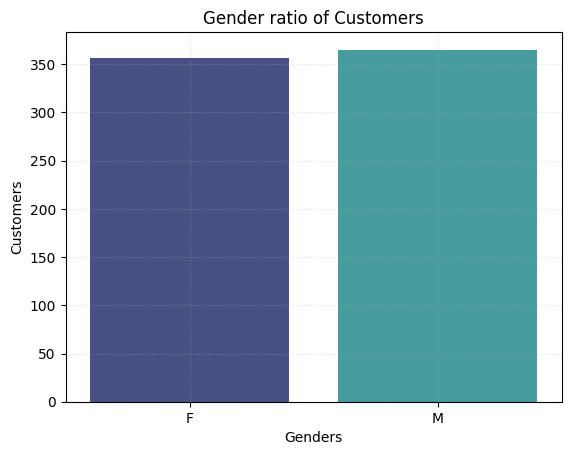

In [262]:
# What is gender ratio of customers

sns.countplot(df.dropna(), x='gender', hue='gender', palette='mako')
plt.title('Gender ratio of Customers')
plt.xlabel('Genders')
plt.ylabel('Customers')
plt.grid(ls=':', alpha=0.4)
plt.show()

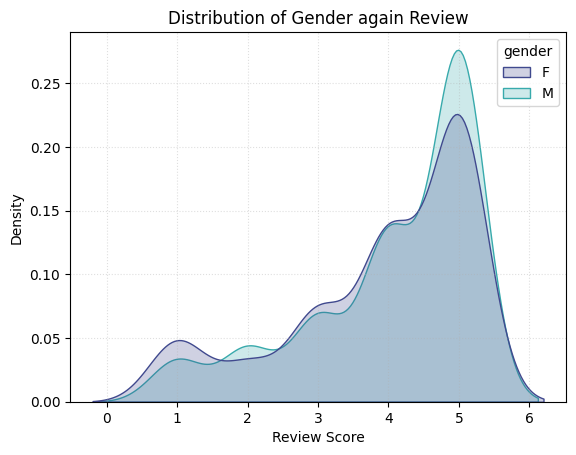

In [263]:
# Distribution of Gender against Review

sns.kdeplot(df.dropna(), x='review_score', hue='gender', palette='mako', fill=True)
plt.title('Distribution of Gender again Review')
plt.xlabel('Review Score')
plt.grid(ls=':', alpha=0.4)
plt.show()

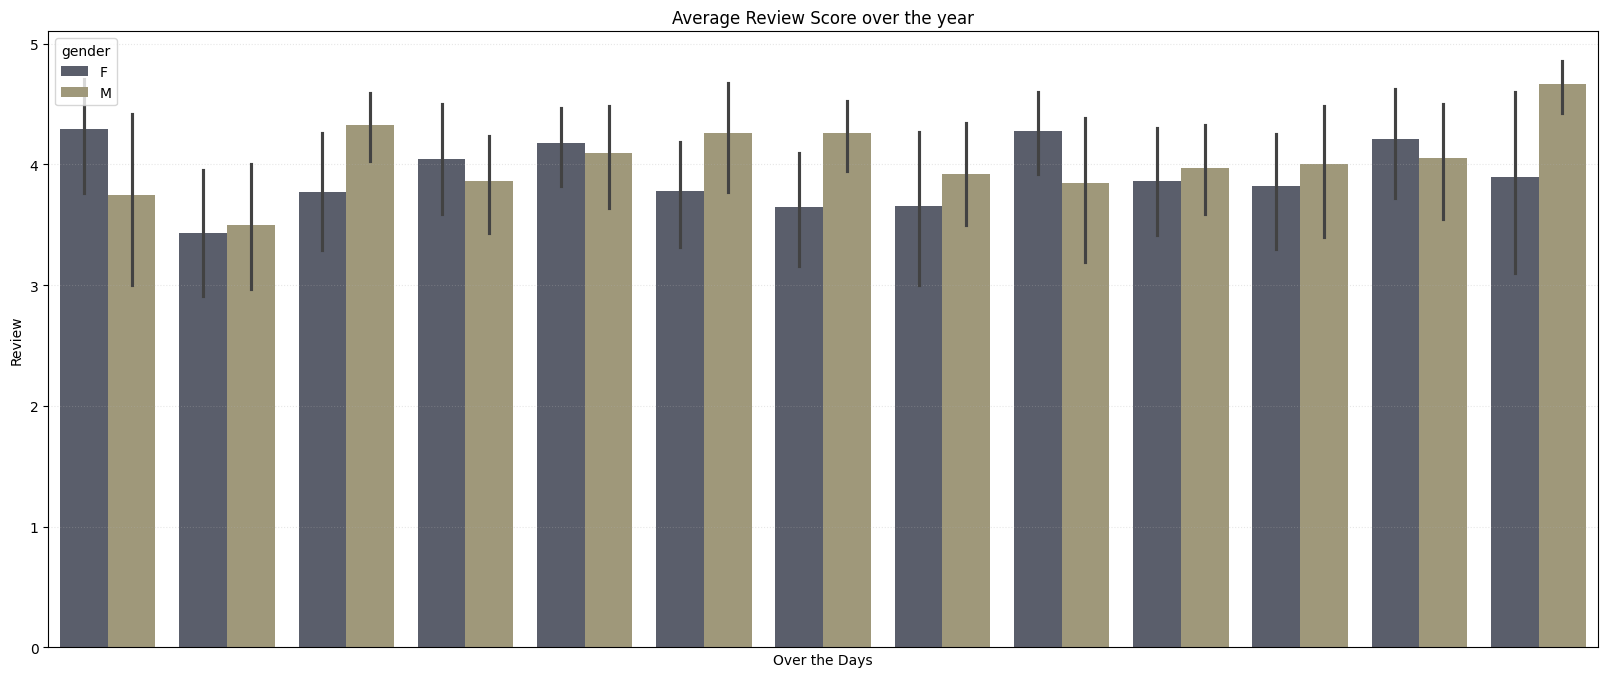

In [264]:
# Review over the year by male and females

df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.strftime('%Y-%m')

plt.figure(figsize=(20, 8))
sns.barplot(df, x='order_month', y='review_score', hue='gender', palette='cividis')
plt.title('Average Review Score over the year')
plt.xlabel('Over the Days')
plt.ylabel('Review')
plt.xticks([])
plt.grid(ls=':', alpha=0.3)
plt.show()

Store has maintained a good gender ratio of Customers,

that is verified by other plot which shows over the years the review of both genders was increasing

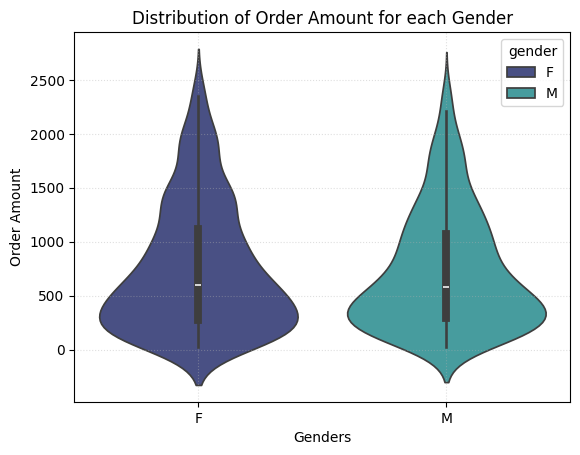

In [265]:
# Which Gender has higher order amount

sns.violinplot(df, x='gender', y='order_total', hue='gender', palette='mako')
plt.title('Distribution of Order Amount for each Gender')
plt.xlabel('Genders')
plt.ylabel('Order Amount')
plt.grid(ls=':', alpha=0.4)
plt.show()

Same as above, maintained gender ratio

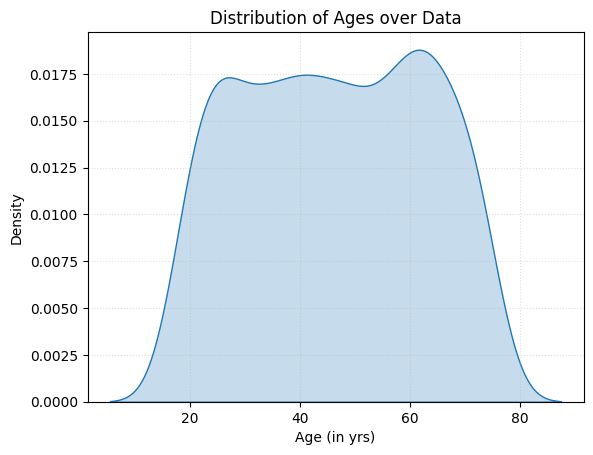

In [266]:
# Distribution of Ages

sns.kdeplot(df, x='age', fill=True)
plt.title('Distribution of Ages over Data')
plt.xlabel('Age (in yrs)')
plt.grid(ls=':', alpha=0.4)
plt.show()

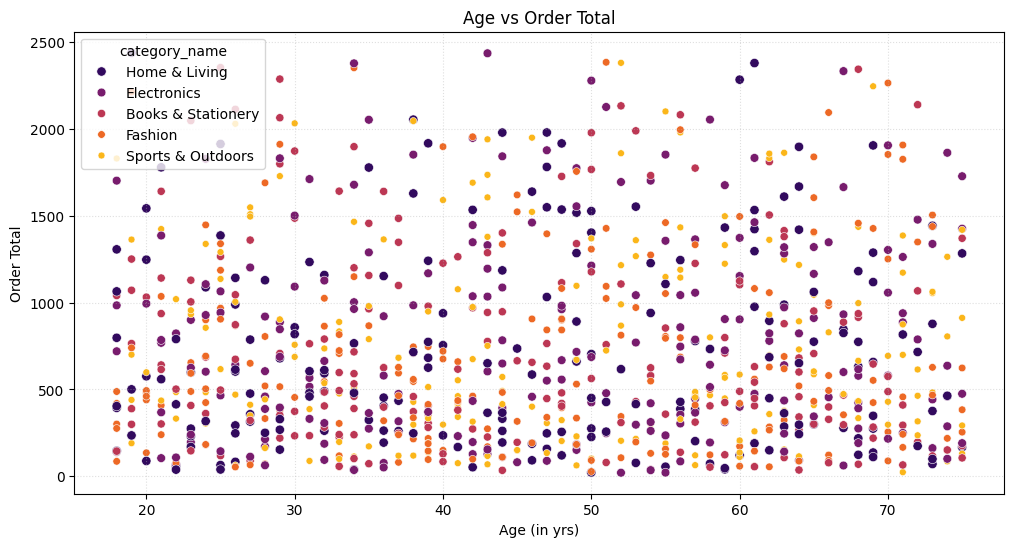

In [269]:
# Which Age vs order amount

plt.figure(figsize=(12, 6))
sns.scatterplot(df, x='age', y='order_total', hue='category_name', palette='inferno', size='category_name', sizes=(25, 45))
plt.title('Age vs Order Total')
plt.xlabel('Age (in yrs)')
plt.ylabel('Order Total')
plt.grid(ls=':', alpha=0.4)
plt.show()

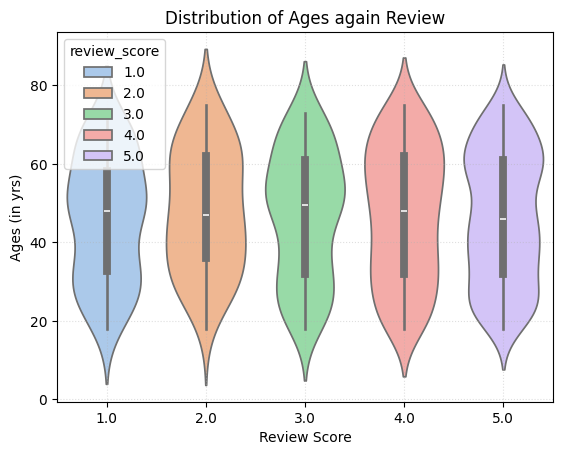

In [270]:
# Distribution of Ages against Review

sns.violinplot(df.dropna(), x='review_score', y='age', hue='review_score', palette='pastel')
plt.title('Distribution of Ages again Review')
plt.ylabel('Ages (in yrs)')
plt.xlabel('Review Score')
plt.grid(ls=':', alpha=0.4)
plt.show()

These plots shows that, the store has catered all ages of customers sucessfully.